In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../input/BES/dionisos_horizons_v1.0.0/"
geo_model = gp.create_model("Dionisos_Horizons_BES_v1.0.0")

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
"""%time
# Loading model, the extension, the resolution and importing the data 
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -10450, 0],
    resolution=[100, 100, 100],
    path_i=data_path + "surface_points_downscaled.csv",
    path_o=data_path + "orientations_points.csv",
    )

# Setting series for formations
gp.map_stack_to_surfaces(
    geo_model,
    {"Strat_Series": (
        'top_formation',
        'mid_formation',
        'base_formation',
        ),
     "Basement_series": (
         'basement',
         ),
     }
    )

# Interpolating the data
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
    )

# Compupting the model
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

# Creating voxel numbers
topo_init = tp.compute_topology(
    geo_model, 
    direction="x",
    voxel_threshold=1
)  #, direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 
    1, 
    topo_init[0], 
    topo_init[1]
)"""

'%time\n# Loading model, the extension, the resolution and importing the data \ngp.init_data(\n    geo_model,\n    extent=[0, 175000, 0, 150000, -10450, 0],\n    resolution=[100, 100, 100],\n    path_i=data_path + "surface_points_downscaled.csv",\n    path_o=data_path + "orientations_points.csv",\n    )\n\n# Setting series for formations\ngp.map_stack_to_surfaces(\n    geo_model,\n    {"Strat_Series": (\n        \'top_formation\',\n        \'mid_formation\',\n        \'base_formation\',\n        ),\n     "Basement_series": (\n         \'basement\',\n         ),\n     }\n    )\n\n# Interpolating the data\ngp.set_interpolator(\n    geo_model, \n    output=[\'geology\'], \n    compile_theano=True, \n    theano_optimizer=\'fast_run\', # fast_compile, fast_run\n    dtype="float64",  # for model stability\n    verbose=[]\n    )\n\n# Compupting the model\ngp.compute_model(\n    geo_model, \n    compute_mesh=True,\n    )\n\n# Creating voxel numbers\ntopo_init = tp.compute_topology(\n    geo_mo

In [3]:
"""# 2D Plot
gp.plot_2d(
    geo_model, 
    direction="y", 
    show_data=False, 
    show_lith=True, 
    ve=1,
    )
gp.plot_2d(
    geo_model, 
    direction="x", 
    show_data=False, 
    show_lith=True, 
    ve=2, 
    legend=True,
    )

# Plot voxel numbers
gp.plot.plot_topology(
    geo_model, 
    edges_init, 
    centroids_init
    )

# 3D Plot
gpv = gp.plot_3d(
    geo_model, 
    image=False, 
    plotter_type='basic', 
    show_data=False
    )"""

'# 2D Plot\ngp.plot_2d(\n    geo_model, \n    direction="y", \n    show_data=False, \n    show_lith=True, \n    ve=1,\n    )\ngp.plot_2d(\n    geo_model, \n    direction="x", \n    show_data=False, \n    show_lith=True, \n    ve=2, \n    legend=True,\n    )\n\n# Plot voxel numbers\ngp.plot.plot_topology(\n    geo_model, \n    edges_init, \n    centroids_init\n    )\n\n# 3D Plot\ngpv = gp.plot_3d(\n    geo_model, \n    image=False, \n    plotter_type=\'basic\', \n    show_data=False\n    )'

In [4]:
"""# Saving model
gp.save_model(
    geo_model, 
    path="../../../output/", 
    compress=True,
    )"""

'# Saving model\ngp.save_model(\n    geo_model, \n    path="../../../output/", \n    compress=True,\n    )'

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[0, 175000, 0, 150000, -10450, 0],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_3_horizons.csv",
    path_o=data_path + "orientations_points_horizons.csv",
)

Active grids: ['regular']


Dionisos_Horizons_BES_v1.0.0  2023-08-10 13:08

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Default series,1,#015482,1
1,Horizon_2,Default series,2,#9f0052,2
2,Horizon_27,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "Horizon_1",
            "Horizon_2",
            #'Horizon_15',
            "Horizon_27",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,Horizon_1,Strat_Series,1,#015482,1
1,Horizon_2,Strat_Series,2,#9f0052,2
2,Horizon_27,Strat_Series,3,#ffbe00,3
3,basement,Basement_series,1,#728f02,4


In [5]:
geo_model.get_data()

X         Y     Z    smooth     surface  \
surface_points 0           0.0       0.0 -1503  2.00e-06   Horizon_1   
               1        5000.0       0.0 -1574  2.00e-06   Horizon_1   
               2        5000.0       0.0 -1574  2.00e-06   Horizon_1   
               3       10000.0       0.0 -1645  2.00e-06   Horizon_1   
               4       10000.0       0.0 -1645  2.00e-06   Horizon_1   
...                        ...       ...   ...       ...         ...   
               12596  165000.0  150000.0 -8849  2.00e-06  Horizon_27   
               12597  170000.0  150000.0 -8979  2.00e-06  Horizon_27   
               12598  170000.0  150000.0 -8979  2.00e-06  Horizon_27   
               12599  175000.0  150000.0 -9002  2.00e-06  Horizon_27   
orientations   0           0.0       0.0 -1503  1.00e-02   Horizon_1   

                           G_x       G_y  G_z  
surface_points 0           NaN       NaN  NaN  
               1           NaN       NaN  NaN  
               2           NaN       NaN  NaN  
               3           NaN       NaN  NaN  
               4           NaN       NaN  NaN  
...                        ...       ...  ...  
               12596       NaN       NaN  NaN  
               12597       NaN       NaN  NaN  
               12598       NaN       NaN  NaN  
               12599       NaN       NaN  NaN  
orientations   0      1.00e-12  1.00e-12  1.0  

[12601 rows x 8 columns]

In [7]:
geo_model.set_default_orientation()

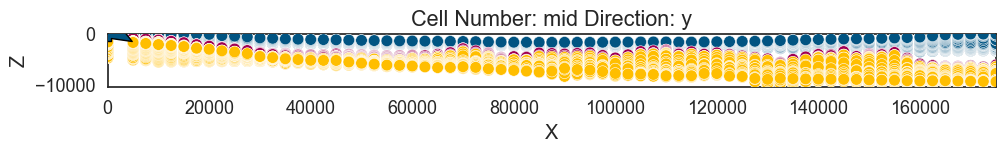

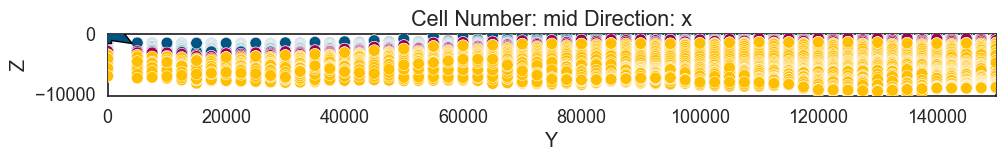

In [6]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [ ]:
# geo_model.set_default_orientation()

In [10]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
)

In [7]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                        values
range               230725.38
$C_o$            1267481011.9
drift equations        [3, 3]
Wall time: 25.2 s


In [8]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

Wall time: 5min 56s



Lithology ids 
  [4.         4.         4.         ... 1.58700195 1.55856333 1.52892452] 

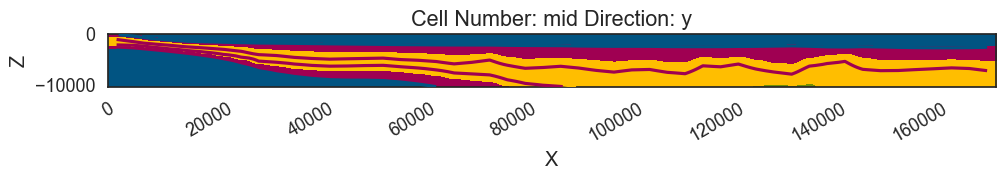

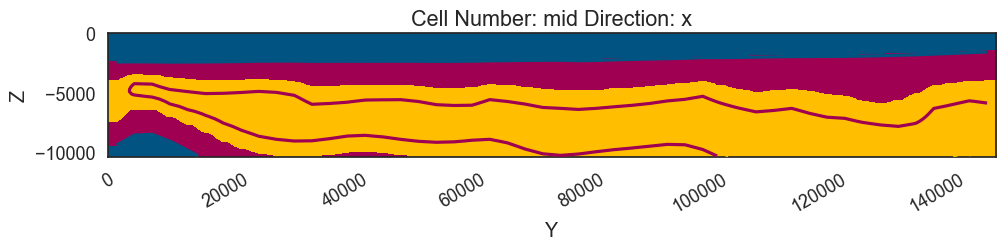

In [9]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [ ]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

In [16]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    path="../../../output/",
    compress=True,
)